# **A Numeric Optimization on a Semi-Analytic Model of Soil Swelling Potential**

Rizal Purnawan<sup>1</sup>\
Ngircuk Hirwo<sup>2</sup>

ORCID: <sup>1</sup>[0000-0001-8858-4036](https://orcid.org/0000-0001-8858-4036)

This notebook contains the computation of our research in geotechnical engineering regarding soil swelling potential.

## **1. Introduction**


We have conducted a laboratory test to investigate the soil swelling potential. A cylindrical soil sample is subjected to constant loading. The deformation of the sample is recorded over time. The data is then processed such that we obtain the soil strain over time. In this notebook, we will build a mathematical model to describe the strain as a function of time. All computations are conducted in this notebook.

## **2. Literature Review**

In this section, we will briefly explain the required machinery for executing this research. Necessary mathematical subjects inlcude probability theory and and general topology. In fact, we also employ ordinary differential equation (ODE). However, we will not cover the explanation about ODE and its calculus foundation. Instead, the readers are assumed to already have sufficient knowledge in ODE.

In addition, set theory and first order logic will regularly be incorporated in any formal expression. Hence, the reader are referred to (Stoll, 1979) for detailed explanations regarding set theory and first order logic.

### **2.1. Probability Theory**

Probability theory [(Bremaud, 2020)](https://doi.org/10.1007/978-3-030-40183-2) will be employed in the statistical analysis to find some relations regarding the dataset of the laboratory test. The most basic concept in probability theory is the formal treatment of probability incorporating measure theory [(Salamon, 2016)](https://doi.org/10.4171/159), known as the probability space. We will list important concepts in probability theory.However, we will not explain measure theory in this discussion. Instead, the readers are referred to [(Salamon, 2016)](https://doi.org/10.4171/159) for the detailed explanation of measure theory.

---
**Definition 1 (Probability Space).**
Suppose an experiment or observation with a set $\Omega$ being the set of samples. A probability space on $\Omega$ is a triple $(\Omega, \mathcal{F}, P)$ where $\mathcal{F}$ is a $\sigma$-algebra [(Salamon, 2016)](https://doi.org/10.4171/159) on $\Omega$ representing the events related to $\Omega$ and $P: \mathcal{F} \to [0, 1]$ is a measure [(Salamon, 2016)](https://doi.org/10.4171/159) called probability measure with the following properties:
1. $P(\varnothing) = 0$
2. $P(\Omega) = 1$
3. For any countable family $\{A_k\}_{k = 1}^\infty \subseteq \mathcal{F}$ such that
\begin{equation}
    \forall i, j \in \mathbb{N} \;\;
    i \neq j \implies A_i \cap A_j = \varnothing \,,
\end{equation}
then
\begin{equation}
    P \left( \bigcup_{k = 1}^\infty A_k \right)
    = \sum_{k = 1}^\infty P(A_k)
\end{equation}
holds.

---
**Definition 2 (Random Variable)**. Let $(\Omega, \mathcal{F}, P)$ be a probability space. A random variable on $\Omega$ is a map $X: \Omega \to \mathbb{R}$ such that $X$ is a measurable function [(Salamon, 2016)](https://doi.org/10.4171/159) with respect to $(\Omega, \mathcal{F})$ and a measurable space on $\mathbb{R}$ [(Salamon, 2016)](https://doi.org/10.4171/159).

---

The random variables that will be employed in this discussion, and most likely in any experimental project, are elements of $L^2$ [(Salamon, 2016)](https://doi.org/10.4171/159), or the square Lebesgue integrable random variables. First, we will pose the formal definition of such random variables in a more general sense as follows.

---
**Definition 3 ($L^p$ Random Variables).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Let $p \in [1, \infty)$. Suppose a vector space $L^p(P)$ of $p$-integrable random variables [(Salamon, 2016)](https://doi.org/10.4171/159). A random variable $X: \Omega \to \mathbb{R}$ have a property $X \in L^p(P)$ if and only if
\begin{equation}
    \left( \int_\Omega |X|^p \,\mathrm{d}P \right)^{\frac{1}{p}} < \infty \,.
\end{equation}

---
An important inequality related to $L^p$ space is that $L^2 \subset L^1$ [(Villani, 1985)](https://doi.org/10.2307%2F2322503) if the underlying measure [(Salamon, 2016)](https://doi.org/10.4171/159) is a finite measure and that the underlying set does not contains arbitrary large measure. As we see that a probability measure has a relatively small value, $P(A) \leq 1$, for every $A \in \mathcal{F}$. Now let us observe the following property that will apply to our experimental problem.

---
**Theorem 1 (Finite Random Variables).** Suppose a probability space $(\Omega, \mathcal{F}, P)$ such that $|\Omega| < \infty$. Suppose a random variable $X: \Omega \to \mathbb{R}$ such that
\begin{equation}
    \forall \omega \in \Omega :\;
    X(\omega) < \infty \,.
\end{equation}
Then $X \in L^2(P)$.

*Proof.* By the boundedness of $X$, let $M \in (0, \infty)$ such that
\begin{equation}
    \forall \omega \in \Omega :\;
    |X(\omega)| < M \,.
\end{equation}
Follows from the formal definition of Lebesgue integral [(Salamon, 2016)](https://doi.org/10.4171/159) and the finiteness of $\Omega$, we obtain
\begin{align}
    \left( \int_{\Omega} X^2 \,\mathrm{d}P \right)^{\frac{1}{2}}
    &= \left( \sum_{\omega \in \Omega} X^2(\omega) P(\{\omega\}) \right)^{\frac{1}{2}} \\
    &\leq \left( \sum_{\omega \in \Omega} X^2(\omega) P(\{\Omega\}) \right)^{\frac{1}{2}} \\
    &= \left( \sum_{\omega \in \Omega} X^2(\omega) \cdot 1 \right)^{\frac{1}{2}} \\
    &< \sqrt{ |\Omega| M^2 } \\
    &= M \sqrt{ |\Omega| } \\
    &< \infty \,,
\end{align}
which shows that $X \in L^2(P)$ according to the earlier definition. $\Box$

---
Note that random variables such as the one described in the theorem above are random variables that mostly describe real world experiments, including the one used in this project. In other words, we will deal with $L^2$ random variables. And by the property from [(Villani, 1985)](https://doi.org/10.2307%2F2322503), the random variables will also be $L^1$.

---
**Definition 4 (Expectation).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Expectation is a map $\mathrm{E}: L^1(P) \to \mathbb{R}$ defined by
\begin{equation}
    \forall X \in L^1(P) :\;
    \mathrm{E}[X] := \int_{\Omega} X \,\mathrm{d}P \,.
\end{equation}

---
In the definition above, indeed we restrict the definition of expectation only on integrable random variables. Since this kind of random variables will be of interests in experimental problems.

---
**Definition 5 (Covariance).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Covariance is a map $\mathrm{cov}: L^2(P) \times L^2(P) \to \mathbb{R}$ defined by
\begin{equation}
    \forall X, Y \in L^2(P) :\;
    \mathrm{cov}(X, Y) := \mathrm{E}[(X - \mathrm{E}[X])(Y - \mathrm{E}[Y])]
    \,.
\end{equation}

---
**Proposition 1 (Simplified Expression of Covariance).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Let $X, Y \in L^2(P)$. Follows from the linaerity property of Lebesgue integral [(Salamon, 2016)](https://doi.org/10.4171/159), we can also express covariance as
\begin{align}
    \mathrm{cov}(X, Y)
    &= \mathrm{E}[(X - \mathrm{E}[X])(Y - \mathrm{E}[Y])] \\
    &= \int_{\Omega} (X - \mathrm{E}[X])(Y - \mathrm{E}[Y]) \,\mathrm{d}P \\
    &= \int_{\Omega} XY - X \mathrm{E}[Y] - \mathrm{E}[X] Y + \mathrm{E}[X] \mathrm{E}[Y] \,\mathrm{d}P \\
    &= \int_{\Omega} XY \,\mathrm{d}P - \int_{\Omega} X \mathrm{E}[Y] \,\mathrm{d}P - \int_{\Omega} \mathrm{E}[X] Y \,\mathrm{d}P + \int_{\Omega} \mathrm{E}[X] \mathrm{E}[Y] \,\mathrm{d}P \\
    &= \int_{\Omega} XY \,\mathrm{d}P - \mathrm{E}[Y] \int_{\Omega} X \,\mathrm{d}P - \mathrm{E}[X] \int_{\Omega} Y \,\mathrm{d}P + \mathrm{E}[X]\mathrm{E}[Y] \\
    &= \mathrm{E}[XY] -\mathrm{E}[Y]\mathrm{E}[X] -\mathrm{E}[X]\mathrm{E}[Y] + \mathrm{E}[X]\mathrm{E}[Y] \\
    &= \mathrm{E}[XY] - 2\mathrm{E}[X]\mathrm{E}[Y] + \mathrm{E}[X]\mathrm{E}[Y] \\
    &= \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y] \,,
\end{align}
or in short,
\begin{equation}
    \mathrm{cov}(X, Y) = \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y] \,.
\end{equation}

---
**Definition 6 (Variance).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Variance is a map $\mathrm{var}: L^2(P) \to \mathbb{R}$ defined by
\begin{equation}
    \forall X \in L^2(P) :\;
    \mathrm{var}(X) := \mathrm{cov}(X, X) \,.
\end{equation}

---
**Definition 7 (Standard Deviation).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Standard deviation is a map $\mathrm{std}: L^2(P) \to \mathbb{R}$ defined by
\begin{equation}
    \forall X \in L^2(P) :\;
    \mathrm{std}(X) := \sqrt{ \mathrm{var}(X) } \,.
\end{equation}

---
Next, we will present the concept of correlation. There are two well-known types of correlation; linear correlation (also known as Pearson correlation) and rank correlation (also known as Spearman correlation). First, it is necessary to present the concept of almost surely.

---
**Definition 8 (Almost Surely).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Suppose a random variable $X: \Omega \to \mathbb{R}$. Let $\phi$ define some property on $X$ such that $\phi X(\omega)$ means that $\phi$ holds at $X(\omega)$, for some $\omega \in \Omega$. Then we say that $X$ is almost surely $\phi$ if and only if
\begin{equation}
    P( \{\omega \in \Omega \mid \phi X(\omega) \} ) = 1 \,.
\end{equation}

---
**Definition 9 (Pearson Correlation).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Let $\mathcal{V}$ be a family of $L^2(P)$ random variables that are not almost surely constant, i. e.,
\begin{align}
    \mathcal{V}
    &:= \{ X \in L^2(P) \mid \neg \exists x \in \mathbb{R} [ P(X = x) = 1] \} \\
    &= \{ X \in L^2(P) \mid \exists x \in \mathbb{R} \neg [ P(X = x) = 1] \} \\
    &= \{ X \in L^2(P) \mid \exists x \in \mathbb{R} [ P(X = x) < 1] \}
    \,.
\end{align}
Then Pearson correlation is a map $\mathrm{corr}: \mathcal{V} \times \mathcal{V} \to \mathbb{R}$ defined by
\begin{equation}
    \forall X, Y \in \mathcal{V} :\;
    \mathrm{corr}(X, Y) := \frac{\mathrm{cov}(X, Y)}{\mathrm{std}(X) \cdot \mathrm{std}(Y)} \,.
\end{equation}

---
We will pose a fundamental property of Pearson correlation, but let us first present an important result from functional analysis known as Holder's inequality. We will present this inequality in a theorem but without a proof. Interested readers are encouraged to find the proof on any analysis literature.

---
**Theorem 2 (Holder's Inequality).** Suppose a measure space $(S, \mathcal{A}, \mu)$ [(Salamon, 2016)](https://doi.org/10.4171/159). Let $f, g: S \to \mathbb{R}$ be measurable functions. Let $p, q \in (1, \infty)$ such that
\begin{equation}
    \frac{1}{p} + \frac{1}{q} = 1 \,.
\end{equation}
Then
\begin{equation}
    \int_S |f g| \,\mathrm{d}\mu
    \leq \left( \int_S |f|^p \,\mathrm{d}\mu \right)^{\frac{1}{p}}
    \left( \int_S |g|^q \,\mathrm{d}\mu \right)^{\frac{1}{q}}
\end{equation}
holds.

---
In the case $p = q = 2$, the inequality is better known as Cauchy-Schwarz inequality. In fact, Holder's inequality is a generalization of Cauchy-Schwarz inequality. Now we present the property of Pearson correlation as follows.

---
**Theorem 3 (Image of Pearson Correlation).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Let $\mathcal{V}$ be a family of $L^2(P)$ random variables that are not almost surely constant. Let $\mathrm{corr}: \mathcal{V} \times \mathcal{V} \to \mathbb{R}$ be the correlation operator. Then
\begin{equation}
    \mathrm{image}(\mathrm{corr}) \subseteq [-1, 1]
\end{equation}
is true.

*Proof.* Let $X, Y \in \mathcal{V}$. By definition $\mathcal{V}$, it is clear that $X, Y \in L^2(P)$. Note that $L^2(P)$ is a vector space, which implies that it is closed under vector addition. Note that $\mathrm{E}[X], \mathrm{E}[Y] \in L^2(P)$. Let $\tilde{X} := X - \mathrm{E}[X]$ and $\tilde{Y} := Y - \mathrm{E}[Y]$. Hence $\tilde{X}, \tilde{Y} \in L^2(P)$. Note that
\begin{equation}
    \mathrm{E}[\tilde{X}^2] = \mathrm{var}(X)
    \;\land\;
    \mathrm{E}[\tilde{Y}^2] = \mathrm{var}(Y) \,.
\end{equation}
Follows from the definition of covariance and the property of Lebesgue integral [(Salamon, 2016)](https://doi.org/10.4171/159), we obtain
\begin{equation}
    |\mathrm{cov}(X, Y)|
    = \left| \int_{\Omega} (X - \mathrm{E}[X])(Y - \mathrm{E}[Y]) \,\mathrm{d}P \right|
    = \left| \int_{\Omega} \tilde{X} \tilde{Y} \,\mathrm{d}P \right|
    \leq \int_{\Omega} \big|\tilde{X} \tilde{Y}\big| \,\mathrm{d}P \,.
\end{equation}
Then by Holder's inequality, we obtain
\begin{equation}
    \int_{\Omega} \big|\tilde{X} \tilde{Y}\big| \,\mathrm{d}P
    \leq \left( \int_{\Omega} \tilde{X}^2 \,\mathrm{d}P \right)^{\frac{1}{2}}
    \left( \int_{\Omega} \tilde{Y}^2 \,\mathrm{d}P \right)^{\frac{1}{2}}
    = \sqrt{ \mathrm{E}[ \tilde{X}^2 ] } \sqrt{ \mathrm{E}[ \tilde{Y}^2 ] }
    = \sqrt{ \mathrm{var}(X) } \sqrt{ \mathrm{var}(Y) }
    = \mathrm{std}(X) \cdot \mathrm{std}(Y) \,.
\end{equation}
Consequently,
\begin{equation}
    |\mathrm{cov}(X, Y)|
    \leq \mathrm{std}(X) \cdot \mathrm{std}(Y) \,.
\end{equation}
Since $X, Y \in \mathcal{V}$, which means that $X$ and $Y$ are not almost surely constant, then $\mathrm{std}(X), \mathrm{std}(Y) > 0$. Then we obtain
\begin{equation}
    |\mathrm{corr}(X, Y)|
    = \frac{|\mathrm{cov}(X, Y)|}{\mathrm{std}(X) \cdot \mathrm{std}(Y)}
    \leq \frac{\mathrm{std}(X) \cdot \mathrm{std}(Y)}{\mathrm{std}(X) \cdot \mathrm{std}(Y)}
    = 1 \,,
\end{equation}
which shows that $\mathrm{cor}(X, Y) \in [-1, 1]$. And it applies to every pair $X, Y \in \mathcal{V}$, hence
\begin{equation}
    \mathrm{image}(\mathrm{corr}) \subseteq [-1, 1] \,,
\end{equation}
which concludes the proof. $\Box$

---
**Definition 10 (Spearman Correlation).** Suppose a probability space $(\Omega, \mathcal{F}, P)$. Let $S^2(P) \subset L^2(P)$ be a family of simple random variables. Which means
\begin{equation}
    \forall X \in S^2(P) :\;
    |\mathrm{image}(X)| < \infty \,.
\end{equation}
Rank coefficient of $X \in S^2(P)$ is a map $R_X: \Omega \to \mathbb{N}$ such that $R_X(\omega)$ is the rank or ordering of $X(\omega)$ in $\mathrm{image}(X)$, for every $\omega \in \Omega$. Then Spearman correlation is a map $\mathrm{corr_r}: \big( \mathcal{V} \cap S^2(P) \big)^2 \to \mathbb{R}$ defined by
\begin{equation}
    \forall X, Y \in \mathcal{V} \cap S^2(P) :\;
    \mathrm{corr}_r(X, Y) := \mathrm{corr}(R_X, R_Y) \,.
\end{equation}

---
As we can see from the definition, Spearman correlation is only well-defined on discrete random variables. However, our lab dataset is discrete, hence Spearman correlation is still well-defined on our data.

The significant different of Pearson and Spearman correlations is that Pearson correlation describes the linear relationship between a pair of random variables, while Spearman correlation describe monotonic relationship between a pair of random variables.

### **2.2. Metric Topology**

The topic in general topology to be included in the research is metric space. Since we deal with numeric data, which are real numbers, the topological space of interest is the one induced from the usual metric space on $\mathbb{R}$ (Andre, 2020).

---
**Definition 11 (Metric Space).** Let $S$ be a set. A map $d: S \times S \to \mathbb{R}$ is called a metric (or distance function) if and only if the following axioms are satisfied:
1. $\forall x, y \in S:\; d(x, y) \geq 0$
2. $\forall x, y \in S:\; d(x, y) = 0 \iff x = y$
3. $\forall x, y \in S:\; d(x, y) = d(y, x)$
4. $\forall x, y, z \in S:\; d(x, y) \leq d(x, z) + d(z, y)$

Given a metric $d: S \times S \to \mathbb{R}$ on $S$, then the pair $(S, d)$ is called a metric space (Andre, 2020).

---
Axioms 2, 3 and 4 in definition 11 are referred to as the point separation axiom, symmetric axiom and triangle inequality respectively.

---
**Definition 12 (Open Ball).** Let $(S, d)$ be a metric space. Let $\rho > 0$. A map $B_\rho: S \to \mathcal{P}(S)$ defined by
\begin{equation}
    \forall x \in S :\;
    B_\rho(x) := \{ u \in S \mid d(u, x) < \rho \}
\end{equation}
is called an open ball operator. Given some point $s \in S$, $B_\rho(s)$ is called an open ball of radius $\rho$ centred at $s$.

---
**Definition 13 (Open Set).** Let $(S, d)$ be a metric space. A set $A \subset S$ is called an open set (or $d$-open set) if and only if $A$ can be expressed as a union of open balls, i. e.,
\begin{equation}
    A = \bigcup_{x \in A} B_{\rho(x)}(x)
\end{equation}
where $\rho: S \to \mathbb{R}$ is a radius function.

---
**Definition 14 (Neighbourhood).** Let $(S, d)$ be a metric space. Let $x \in S$. A neighbourhood of $x$ is a set $A$ such that
\begin{equation}
    \exists r > 0[ B_r(x) \subseteq A ] \,.
\end{equation}

---
Note that every point is an element of its ball, indeed, it the point is in the centre of the ball in a sense of metric space. While a neighbourhood of a point must contain an open ball of the point, it can bee guaranteed that the point is contained in the neighbourhood.

We end the discussion of metric topology up to this point, since we have coverd the necessary topics in metric topology which will be incorporated in the analysis.

## **3. Exploratory Data Analysis**

We will observe the data from the laboratory test in order to decide what mathematical theory to be used as a model of the soil strain.

Python packages such as `numpy`, `pandas`, `matplotlib` will be used in this process.

In [ ]:
#@title ##### Python Libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#@title ##### Data Extraction

path = "/content/drive/MyDrive/Datasets/swelling_potential.xlsx"

def soil_data():
    df = pd.read_excel(path, sheet_name= "original soil")
    df.columns = [
        "time", "dial_reading",
        "swelling", "diff_Ht",
        "fin_Ht", "strain",
        "diff_vol"
    ]
    return pd.DataFrame(df, columns = ["time", "strain"])

soil = soil_data().copy()

### **3.1. Visualization of Lab Dataset**

The lab tes dataset is visualized as follows:

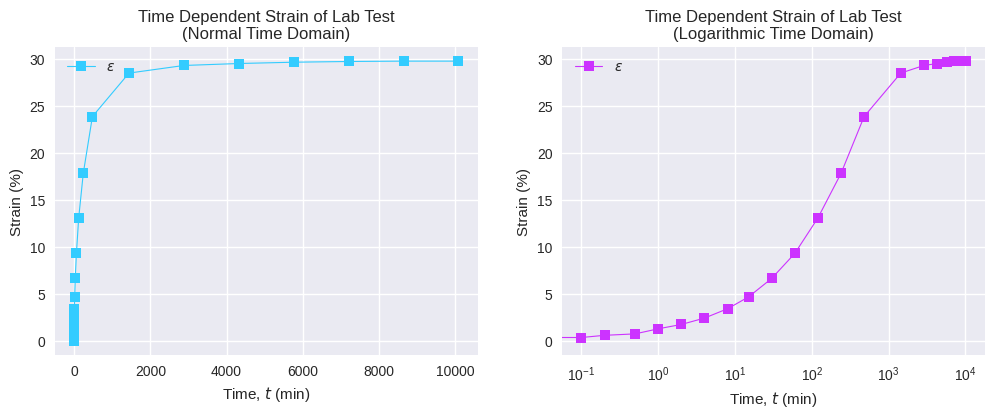

In [ ]:
#@title ##### Soil Data Visualization

with matplotlib.style.context("seaborn-v0_8", after_reset= True):
    init_dat_fig, init_dat_axs = plt.subplots(
        nrows= 1, ncols= 2, figsize= (12, 4)
    )
    init_dat_fig = soil.plot(
        x= "time", y= "strain",
        xlabel= r"Time, $t$ (min)",
        ylabel= "Strain (%)",
        label= r"$\varepsilon$",
        title= "Time Dependent Strain of Lab Test\n(Normal Time Domain)",
        marker= "s", color= plt.cm.cool(0.2), linewidth= 0.8,
        ax= init_dat_axs[0]
    )
    init_dat_fig = soil.plot(
        x= "time", y= "strain",
        xlabel= r"Time, $t$ (min)",
        ylabel= "Strain (%)",
        label= r"$\varepsilon$",
        title= "Time Dependent Strain of Lab Test\n(Logarithmic Time Domain)",
        marker= "s", color= plt.cm.cool(0.8), linewidth= 0.8,
        logx= True, ax= init_dat_axs[1]
    )
    init_dat_fig = plt.show()

If we observe the graph, it seems like resembling the graph of an inverse exponential function. While the logarithmic scale plot shows that $\log(t) \mapsto \varepsilon(t)$ is a sigmoid curve. If this is indeed the case, we can use an inverse exponential function to model $\varepsilon$. However, we need a rigorous and formal construction for this matter.

### **3.2. Mathematical Model of Strain**

Therefore, we now present a partial mathematical model of the soil strain. Suppose $T \subseteq [0, \infty)$ is the time domain of the strain. The set $T$ is designated to be an interval, not necessarily compact, but connected. We model the strain as a map $\varepsilon: T \to \mathbb{R}$. Now let $\tilde{T} \subset T$ represent the set of time points within the lab dataset. Obviously, $|\tilde{T}| < \infty$. Suppose $|\tilde{T}| = N + 1$, for some $N \in \mathbb{N}$. In particular, we may express $\tilde{T}$ by
\begin{equation}
    \tilde{T} := \{t_0, t_1, \dotsc, t_N\} \,.
\end{equation}
We also define
\begin{equation}
    \tilde{T}_1 := \{t_1, \dotsc, t_N\} \,.
\end{equation}

Now we want to confirm a hypothesis that $\varepsilon\big|_{\tilde{T}_1}$ is negatively proportional to the difference quotient of itself. We will use both statistical analysis and visual observation for this case. The difference quotient of $\varepsilon$, given by the map $\frac{\Delta \varepsilon}{\Delta t}: \tilde{T}_1 \to \mathbb{R}$,
is defined by
\begin{equation}
    \forall k \in \{1, \dotsc, N\} :\;
    \frac{\Delta \varepsilon}{\Delta t}(t_k)
    := \frac{\varepsilon(t_k) - \varepsilon(t_{k - 1})}{t_k - t_{k - 1}} \,.
\end{equation}

#### **3.2.1. Statistical Analysis**

For the statistical analysis, we will evaluate the correlation between $\varepsilon\big|_{\tilde{T}_1}$ and $\frac{\Delta \varepsilon}{\Delta t}$. Note that we can define a probability space $(\tilde{T}_1, \mathcal{F}_{\tilde{T}_1}, P)$ on $\tilde{T}_1$ with the probability measure $P: \mathcal{F}_{\tilde{T}_1} \to [0 , 1]$ defined by
\begin{equation}
    \forall t \in \tilde{T}_1 :\;
    P(t) := \frac{|\{t\}|}{|\tilde{T}_1|} = \frac{1}{N} \,.
\end{equation}
Then $\varepsilon\big|_{\tilde{T}_1}$ and $\frac{\Delta \varepsilon}{\Delta t}$ can be considered as discrete random variables on $(\tilde{T}_1, \mathcal{F}_{\tilde{T}_1}, P)$. Note that the strain numeric values from our lab test are bounded, i. e.,
\begin{equation}
    \forall t \in \tilde{T} :\;
    |\varepsilon(t)| = \varepsilon(t) < \infty
\end{equation}
with $\varepsilon(t_0) = 0$. Hence, by the theorem 1 section 2 earlier, we have $\varepsilon\big|_{\tilde{T}_1}, \frac{\Delta \varepsilon}{\Delta t} \in L^2(P)$. Therefore, the correlation operator is well defined on $\varepsilon\big|_{\tilde{T}_1}, \frac{\Delta \varepsilon}{\Delta t}$. We will apply both Pearson and Spearman correlations for the analysis.

The computations are presented as follows.

In [ ]:
#@title ##### Computing Pearson and Spearman Correlation

# 1. Computing difference quotient:
# 1.1. The list of different quotient:
diff_quot = [
    ( list(soil["strain"])[k] - list(soil["strain"])[k - 1] )
    / ( list(soil["time"])[k] - list(soil["time"])[k - 1] )
    for k in range(1, len(soil))
]

# 1.2. Creating a new dataframe of soil strain:
soil_process = soil.loc[1:, :].copy()

# 1.3. Including the different quotient in the new dataframe:
soil_process["strain_diff"] = diff_quot

# 2. Computing Pearson corr of strain and the diff. quotient of strain:
#       We can use pandas dataframe method `.corr`.
pearson_corr_df = soil_process.loc[:, ["strain", "strain_diff"]].corr(
    method= "pearson"
)
print("Pearson Correlation Data Frame")
print("-" *len("Pearson Correlation Data Frame"))
display(pearson_corr_df)

# 3. Computing Spearman corr of strain and the diff. quotient of strain:
#       We can use pandas dataframe method `.corr`.
spearman_corr_df = soil_process.loc[1:, ["strain", "strain_diff"]].corr(
    method= "spearman"
)
print("\nSpearman Correlation Data Frame")
print("-" *len("Spearman Correlation Data Frame"))
display(spearman_corr_df)

Pearson Correlation Data Frame
------------------------------


,strain,strain_diff
strain,1.000000,-0.536875
strain_diff,-0.536875,1.000000



Spearman Correlation Data Frame
-------------------------------


,strain,strain_diff
strain,1.00000,-0.99812
strain_diff,-0.99812,1.00000


The computation shows a significant negative linear relationship between $\varepsilon\big|_{\tilde{T}_1}$ and $\frac{\Delta \varepsilon}{\Delta t}$ and a very strong negative monotonic relationship between the two. Therefore, we conclude
\begin{equation}
    \frac{\Delta \varepsilon}{\Delta t} \propto -\varepsilon \big|_{\tilde{T}_1}
    \,.
\end{equation}

#### **3.2.2. Informal Analysis**

For a complementation to the statistical analysis, let us visualize the graph of both $\varepsilon \big|_{\tilde{T}_0}$ and $\frac{\Delta \varepsilon}{\Delta t}$.

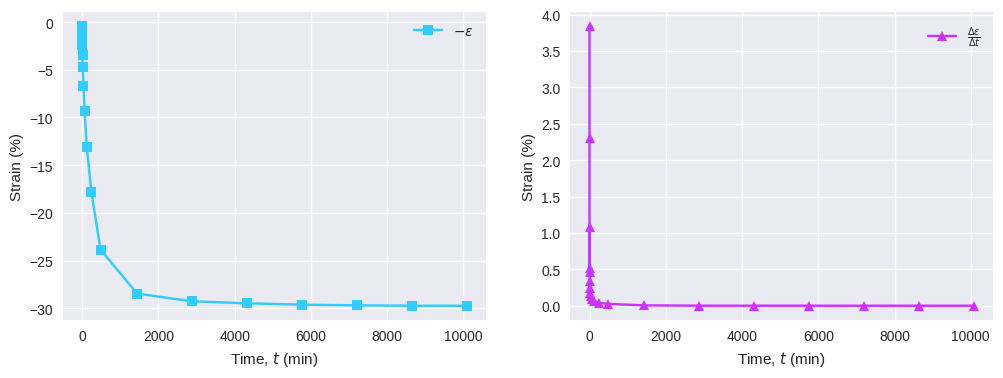

In [ ]:
#@title ##### Graphs of $\varepsilon \big|_{\tilde{T}_0}$ and $\frac{\Delta \varepsilon}{\Delta t}$

def visualize_strain_diff():
    df = soil_process.copy()
    df["strain"] = -1 *df["strain"]
    cols = list(df.columns)
    cols[1] = "neg_strain"
    df.columns = cols
    with matplotlib.style.context("seaborn-v0_8", after_reset= True):
        corr_fig, corr_axs = plt.subplots(
            nrows= 1, ncols= 2, figsize= (12, 4)
        )
        corr_fig = df.plot(
            x= "time", y= "neg_strain",
            xlabel= r"Time, $t$ (min)", ylabel= r"Strain (%)",
            label= r"$-\varepsilon$", marker= "s",
            color= plt.cm.cool(0.2),
            ax= corr_axs[0]
        )
        corr_fig = df.plot(
            x= "time", y= "strain_diff",
            xlabel= r"Time, $t$ (min)", ylabel= r"Strain (%)",
            label= r"$\frac{\Delta \varepsilon}{\Delta t}$",
            color= plt.cm.cool(0.8), marker= "^",
            ax= corr_axs[1]
        )

        corr_fig = plt.show()

visualize_strain_diff()

The plots above informally indicate a similarity between $-\varepsilon\big|_{\tilde{T}_1}$ and $\frac{\Delta \varepsilon}{\Delta t}$.

## **4. Modeling of Soil Strain**

The main goal of this research is to find an appropriate model for $\varepsilon$. Based on the latest result
\begin{equation}
    \frac{\Delta \varepsilon}{\Delta t} \propto -\varepsilon \big|_{\tilde{T}_0} \,,
\end{equation}
we decide to assume that $\frac{\mathrm{d} \varepsilon}{\mathrm{d}t} \propto -\varepsilon$. Hence we propose a differential equation (Kreyszig, 2012)
\begin{equation}
    \frac{\mathrm{d} \varepsilon}{\mathrm{d} t}
    = a - \beta \varepsilon
\end{equation}
as a implication of $\frac{\mathrm{d} \varepsilon}{\mathrm{d}t} \propto -\varepsilon$, where $a, \beta \in \mathbb{R}$ are some unknown constants such that $\beta \neq 0$. It is, therefore, $\varepsilon$ is designated to be a differentiable function.

### **4.1. General Solution**

The differential equation of $\varepsilon$ is a separable ODE (Kreysiz, 2012). We solve the equation as follows:
\begin{align}
    \frac{\mathrm{d} \varepsilon}{a - \beta \varepsilon}
    &= \mathrm{d} t \\
    \therefore
    \int \frac{\mathrm{d} \varepsilon}{a - \beta \varepsilon}
    &= \int \mathrm{d} t \\
    \therefore
    -\frac{1}{\beta} \int \frac{\mathrm{d} g}{g}
    &= t + C_1 \\
    \therefore
    -\frac{ \ln{|g|} }{\beta}
    &= t + C_1 \\
    \therefore
    \ln{|g|}
    &= -\beta t + C_2 \\
    \therefore
    g &= C_3 e^{-\beta t} \\
    \therefore
    a - \beta \varepsilon &= C_3 e^{-\beta t} \\
    \therefore
    \varepsilon &= \frac{a}{\beta} - C e^{-\beta t} \\
    &:= \alpha - C e^{-\beta t}
\end{align}
Hence the general solution is given by
\begin{equation}
    \forall t \in T :\;
    \varepsilon(t) = \alpha - C e^{-\beta t}
\end{equation}
with $\alpha, \beta, C \in \mathbb{R}$, for every $t \in T$.

### **4.2. Particular Solution**

A set of boundary conditions is given in order to obtain a particular solution. Generally the schema of the boundary condition with respect to the nature of the data is given as follows:
1. $\varepsilon(0) = 0$
2. $\lim_{t \to \infty} \varepsilon(t) < \infty$

Condition 2 is designated based on the graph of $\varepsilon$ on its original domain as well as the $\log(t)$ domain.

Now we need to solve $\alpha, \beta, C$ from the general solution. Follows from condition 1, we obtain
\begin{equation}
    0 = \varepsilon(0) = \alpha - C e^{-\beta \cdot 0} = \alpha - C
\end{equation}
which shows that $C = \alpha$. Hence, the updated particular solution is given by
\begin{equation}
    \forall t \in T :\;
    \varepsilon(t) = \alpha \left( 1 - e^{-\beta t} \right) \,.
\end{equation}

Follows from condition 2, we obtain
\begin{equation}
    \lim_{t \to \infty} \varepsilon(t)
    = \lim_{t \to \infty} \alpha \left(1 - e^{-\beta t} \right)
    = \lim_{t \to \infty} \alpha \left(1 - \frac{1}{e^{\beta t}} \right)
    = \alpha (1 - 0)
    = \alpha \,,
\end{equation}
which shows that $\varepsilon$ converges to $\alpha$. We can use this property to determine $\beta$ by designating the value of $\alpha$.An approach to determine $\alpha$ can be from
\begin{equation}
    \alpha := \max_{t \in \tilde{T}_1} \varepsilon(t) + \delta \,,
\end{equation}
where $\delta > 0$ is a considerably small number to be estimated. The expression
\begin{equation}
    \beta = \ln{ \left( \frac{\alpha}{\alpha -\varepsilon(t)} \right)^\frac{1}{t} }
\end{equation}
gives us $\beta$.

Any given value of $t \in T$ will give us a value of $\beta$. And there are finitely many such $t \in \tilde{T}$. However, we are almost certain that different $t \in \tilde{T}$ will give a different result of $\beta$ due to data imperfection as well as randomness factor. With the $\beta$ that we obtain using this strategy, we can say that our resulting function is an approximation $\hat{\varepsilon}: T \to \mathbb{R}$ instead of the precise $\varepsilon$. The best that we can obtain is some $\beta$ such that the difference between $\varepsilon$ and $\hat{\varepsilon}$ is minimized. We will employ the so-called $\rho$-reliability criterion [(Purnawan, 2023)](http://dx.doi.org/10.20944/preprints202310.1770.v1).

We designate that $\hat{\varepsilon}$ has to be a $\rho$-reliable model for $\varepsilon$, i. e., there exists some small $\rho > 0$ such that
\begin{equation}
    \Big\| \varepsilon\big|_{\tilde{T}} -\hat{\varepsilon} \Big\|_{2: \varepsilon |_{\tilde{T}} -\mathrm{E}[\varepsilon |_{\tilde{T}}]}^2
    < \rho \,,
\end{equation}
where $\|\cdot\|_{2:r}$ denotes the $r$-norm [(Purnawan, 2023)](http://dx.doi.org/10.20944/preprints202310.1770.v1).

### **4.3. Optimization**

Follows from the expression of $\beta$ from the earlier section, we can say that there is a map $t \mapsto \beta$ on $\tilde{T}_0$. Then there is also a map
\begin{equation}
    \nu: \beta \mapsto \Big\| \varepsilon\big|_{\tilde{T}} -\hat{\varepsilon}_\beta \Big\|_{2: \varepsilon\big|_{\tilde{T}} -\mathrm{E}[\varepsilon |_{\tilde{T}}]}^2 \,.
\end{equation}
The expression $\hat{\varepsilon}_\beta$ denotes a $\hat{\varepsilon}$ from a certain value of $\beta$.
Suppose the set $\mathcal{B}$ is all possible values of $\beta$. Then the map $\nu$ can be rewritten into
$\nu: \mathcal{B} \to \mathbb{R}$ and is defined by
\begin{equation}
    \forall \beta \in \mathcal{B} :\;
    \nu(\beta) := \Big\| \varepsilon\big|_{\tilde{T}} -\hat{\varepsilon}_\beta \Big\|_{2: \varepsilon |_{\tilde{T}} -\mathrm{E}[\varepsilon |_{\tilde{T}}]}^2 \,.
\end{equation}
Note that $\mathrm{image}(\nu) \subset [0, \infty)$. The desired $\beta$ would be the one
\begin{equation}
    \underset{\beta \in \mathcal{B}}{\arg \inf} \;\nu(\beta) \,.
\end{equation}
However, we cannot be certain whether this kind of $\beta$ is attainable.

#### **4.3.1. Optimization from the Data**

Our first approach will be getting $\beta$ from the available data. Suppose $\mathcal{B}_d \subset \mathcal{B}$ such that $\mathcal{B}_d$ is the family of such $\beta$ that we directly obtain from the data. Our first step will be determining
\begin{equation}
    \beta_d := \underset{\beta \in \mathcal{B}_d}{\arg \min} \;\nu(\beta) \,.
\end{equation}

The computation of $\beta_d$ is conducted in the following cell:

Computational Result
--------------------
beta_d = 0.004829
r-norm = 0.015801




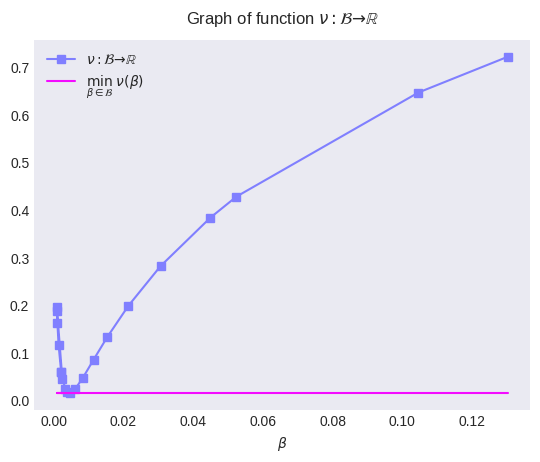

In [ ]:
#@title ##### Computing $\beta_d$

# Necessary functions for computing beta:
def compute_beta(t, epsilon, alpha):
    ln = np.log     # <-- Numpy function of ln
    return (1/t) *ln(alpha / (alpha - epsilon))

def epsilon(t, alpha, beta):
    e = np.e
    return alpha *(1 - e**(-beta *t))

def r_norm2(Y, Y_hat):
    EY = [np.mean(Y)] *len(Y)
    return (
        sum([(a - b)**2 for a, b in zip(Y, Y_hat)])
        / sum([(a - b)**2 for a, b in zip(Y, EY)])
    )

def find_beta_from_data(delta, complete_output= False):
    dat = soil_process.copy()
    alpha = max([a + delta for a in dat["strain"]])
    Bd = [
        compute_beta(t, eps, alpha)
        for t, eps in zip(list(dat["time"]), list(dat["strain"]))
        ]
    squared_rnorm = [
        r_norm2(
            list(dat["strain"]),
            [epsilon(t, alpha, b) for t in dat["time"]]
            )
        for b in Bd
    ]
    rnorm2_Bd = dict(zip(squared_rnorm, Bd))
    beta_d = rnorm2_Bd[min(squared_rnorm)]
    if complete_output == True:
        Bd_df = pd.DataFrame({"beta": Bd, "nu": squared_rnorm})
        return Bd_df
    else:
        return beta_d, min(squared_rnorm)

# Computation of beta from data:
delta = 10**(-8)
beta_d = find_beta_from_data(delta)[0]
least_rnorm2_data = find_beta_from_data(delta)[1]
nu_df = find_beta_from_data(delta, complete_output= True)

print("Computational Result")
print("-" *len("Computational Result"))
print(f"beta_d = {round(beta_d, 6)}")
print(f"r-norm = {round(least_rnorm2_data, 6)}")
print("\n")

with matplotlib.style.context("seaborn-v0_8-dark", after_reset= True):
    nu_fig, nu_ax = plt.subplots(nrows= 1, ncols= 1)
    nu_fig = nu_df.plot(
        x= "beta", y= "nu",
        xlabel= r"$\beta$",
        marker= "s", label= r"$\nu: \mathcal{B} \to \mathbb{R}$",
        color= plt.cm.cool(0.5), ax= nu_ax
    )
    nu_ax.plot(
        nu_df["beta"], [least_rnorm2_data] *len(nu_df),
        label= r"$\min_{\beta \in \mathcal{B}}{\;\nu(\beta)}$",
        color= plt.cm.cool(0.95)
        )
    nu_fig = plt.title(
        r"Graph of function $\nu: \mathcal{B} \to \mathbb{R}$",
        pad= 12
    )
    nu_fig = plt.legend()
    nu_fig = plt.show()

From the result above, we have that our model $\hat{\varepsilon}$ is 0.016-reliable with respect to $\varepsilon$, which is quite accurate from a numerical perspective. Let us try further improve the accuracy.

#### **4.3.2. Convex-Inspired Optimization**

In the corresponding paper of this research [(Hirwo and Purnawan, 2023)](http://dx.doi.org/10.13140/RG.2.2.21197.61928), we have shown that closed-form analytic solutions cannot be obtained. We have also shown that $\nu$ forms a convex function on a neighbourhood of $\beta_d$. Convexity asserts that the function has a global minimum. We will reiterate the convexity of $\nu$ on a neighbourhood of $\beta_d$. But, instead of working on an analytic optimization, which impossible, we will work on the numeric optimization.

It is deisgnated that there exist some $r > 0$ such that $\nu\big|_{B_r(\beta_d)}: B_r(\beta_d) \to \mathbb{R}$ is convex, where $B_r(\beta_d)$ denotes an open ball of radius $r > 0$ centred at $\beta_d$ with respect to the standard metric space $(\mathbb{R}, d)$ on $\mathbb{R} \supset \mathcal{B}$, i. e.,
\begin{equation}
    B_r(\beta_d) = \{ b \in \mathcal{B} \mid d(b, \beta_d) < r \} \,,
\end{equation}
which is also an open neighbourhood of $\beta_d$. By convexity, $\nu\big|_{B_r(\beta_d)}$ has a global minimum. However, no analytic solutions can be obtained. Therefore, we turn to numeric solution.

Now let $S \subset B_r(\beta_d)$ such that $|S| < \infty$. Now we need to seek some $\beta_s \in S$ such that
\begin{equation}
    \nu(\beta_s) = \min_{b \in S}{\nu(b)} \,.
\end{equation}
This $\beta_s$ should be an optimized $\beta$ satisfying
\begin{equation}
    \nu(\beta_s) \leq \nu(\beta_d) \,.
\end{equation}
In particular, we define $S$ by
\begin{equation}
    S := \{ b \in B_r(\beta_d) \mid \exists k \in \mathbb{N}[b = \inf{B_r(\beta_d) + ks}] \}
\end{equation}
for some small increment $s > 0$.

We compute $\beta_s$ in the following cell.

Computational Result for beta_s
-------------------------------
beta_s = 0.00452
nu_s = 0.01542



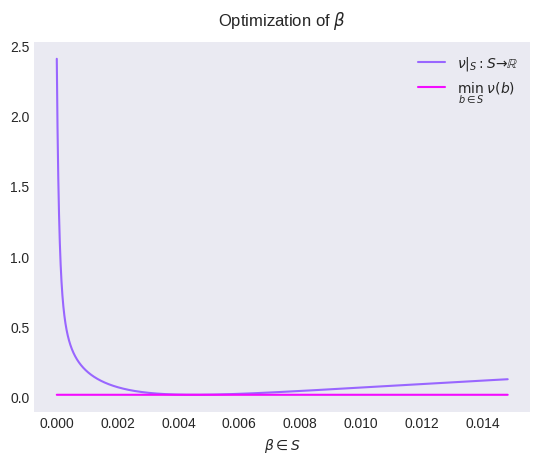

In [ ]:
#@title ##### Computing $\beta_s$

# Algorithm for computing nu:
def nu(b, delta= 10**(-8)):
    epsilon = list(soil_process["strain"])
    alpha = soil_process["strain"].max() + delta
    eps_hat = [alpha *(1 - np.e**(-b *t)) for t in soil_process["time"]]
    return r_norm2(epsilon, eps_hat)

# Algorithm for computing beta_s:
def compute_beta_s(beta_d, r, s, complete_output= False):
    inf_Br = max(beta_d - r, 0)     # <-- infimum of Br(beta_d)
    sup_Br = beta_d + r             # <-- supremum of Br(beta_d)

    # Generating the set S according to the equation above:
    S = list()
    k = 0
    while inf_Br + k *s <= sup_Br:
        S.append(inf_Br + k *s)
        k += 1

    # Computing beta_s:
    S_nu_pd = pd.DataFrame({"S": S, "nu": [nu(b) for b in S]})
    S_nu_dic = {b: s for s, b in zip(S, [nu(b) for b in S])}
    if complete_output == True:
        return S_nu_pd
    else:
        return S_nu_dic[min(S_nu_dic.keys())], min(S_nu_dic.keys())

beta_s, nu_s = compute_beta_s(
    beta_d,     # <-- The result from previous computation
    0.01,       # <-- r := 0.01
    0.000001    # <-- s := 0.000001
)

# Displaying beta_s:
print("Computational Result for beta_s")
print("-" *len("Computational Result for beta_s"))
print(f"beta_s = {beta_s}")
print(f"nu_s = {round(nu_s, 5)}\n")

# Displaying graph for beta_s optimization:
beta_s_df = compute_beta_s(
    beta_d,     # <-- The result from previous computation
    0.01,       # <-- r := 0.01
    0.000001,   # <-- s := 0.000001
    complete_output= True
)
with matplotlib.style.context("seaborn-v0_8-dark", after_reset= True):
    beta_s_fig, beta_s_axs = plt.subplots(nrows= 1, ncols= 1)
    beta_s_fig = beta_s_df.plot(
        x= "S", y= "nu",
        xlabel= r"$\beta \in S$",
        label= r"$\nu |_{S}: S \to \mathbb{R}$",
        color= plt.cm.cool(0.6), ax= beta_s_axs
        )
    beta_s_axs.plot(
        beta_s_df["S"], [nu_s] *len(beta_s_df),
        color= plt.cm.cool(0.95),
        label= r"$\min_{b \in S}{\; \nu(b)}$"
        )
    beta_s_fig = plt.legend()
    beta_s_fig = plt.title(r"Optimization of $\beta$", pad= 12)
    beta_s_fig = plt.show()

The result above shows that our current $\hat{\varepsilon}$ is 0.0155-reliable with respect to $\varepsilon$. It is approximately 0.001 better improvement compared to the earlier optimization. We will proceed with this result.

## **5. Result and Conclusion**

Based on the mathematical model we have formulated as well as the optimization on the model, we obtain a 0.0155-reliable model which is given by
\begin{equation}
    \forall t \in T:\;
    \hat{\varepsilon}(t) = 29.73080001 \big(1 - e^{-0.00452 t}\big)
    \,.
\end{equation}
The plot of the solution together with the original data is presented as follows.

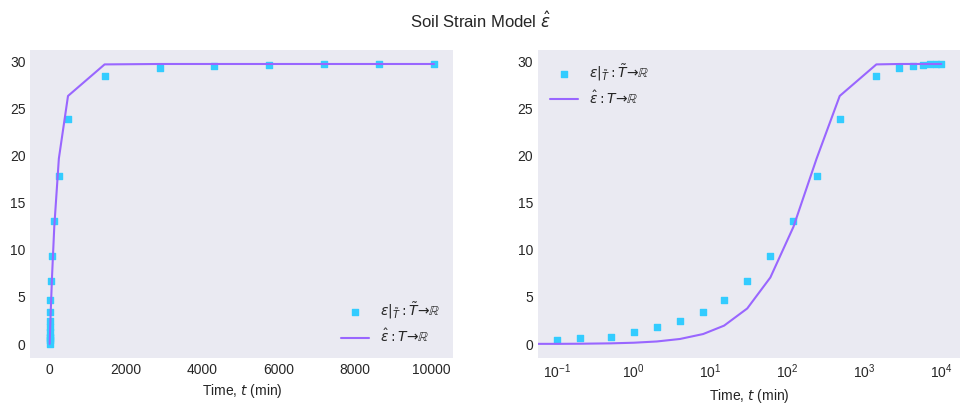

In [ ]:
#@title ##### Plot of $\hat{\varepsilon}$

# Function for computing epsilon_hat:
def eps_hat(t):
    alpha = soil_process["strain"].max() + delta
    beta = beta_s
    return alpha *(1 -np.e**(-beta *t))

soil_result = soil.copy()
soil_result["strain_model"] = [eps_hat(t) for t in soil_result["time"]]

with matplotlib.style.context("seaborn-v0_8-dark", after_reset= True):
    result_fig, result_axs = plt.subplots(nrows= 1, ncols= 2, figsize= (12, 4))
    result_fig = soil_result.plot(
        kind= "scatter",
        x= "time", y= "strain",
        xlabel= r"Time, $t$ (min)", ylabel= "",
        label= r"$\varepsilon |_{\tilde{T}}: \tilde{T} \to \mathbb{R}$",
        color= plt.cm.cool(0.2), marker= "s",
        ax= result_axs[0]
    )
    result_fig = soil_result.plot(
        x= "time", y= "strain_model",
        xlabel= r"Time, $t$ (min)", ylabel= "",
        label= r"$\hat{\varepsilon}: T \to \mathbb{R}$",
        color= plt.cm.cool(0.6),
        ax= result_axs[0]
    )
    result_fig = soil_result.plot(
        kind= "scatter",
        x= "time", y= "strain",
        xlabel= r"Time, $t$ (min)", ylabel= "",
        label= r"$\varepsilon |_{\tilde{T}}: \tilde{T} \to \mathbb{R}$",
        color= plt.cm.cool(0.2), logx= True, marker= "s",
        ax= result_axs[1]
    )
    result_fig = soil_result.plot(
        x= "time", y= "strain_model",
        xlabel= r"Time, $t$ (min)", ylabel= "",
        label= r"$\hat{\varepsilon}: T \to \mathbb{R}$",
        color= plt.cm.cool(0.6), logx= True,
        ax= result_axs[1]
    )
    result_fig = plt.suptitle(r"Soil Strain Model $\hat{\varepsilon}$")
    result_fig = plt.show()

The result shows that model gives a satisfactory result. The model may not precisely the same as the data, but it provides a desirable accuracy with a squared $r$-norm of 0.0154. Equivalently, the coefficient of determination of the model is given by
\begin{equation}
    R^2 = 1 - \big\|\varepsilon|_{\tilde{T}} - \hat{\varepsilon}\|_{2: \varepsilon|_{\tilde{T}} - \mathrm{E}[\varepsilon|_{\tilde{T}}]}^2
    = 1 - 0.0154
    = 0.9846 \,,
\end{equation}
which also indicates a desirable result.

## **Reference**

Andre, Robert. (2020). *Point set topology with topics*. Author. University of Waterloo Department of Pure Mathematics.

Bremaud, Pierre. (2020). *Probability Theory and Stochastic Processes*. Springer. DOI: https://doi.org/10.1007/978-3-030-40183-2

Hirwo, N. and Purnawan, R. (2023) *A Numeric Optimization on a Semi-Analytic Model of Soil Swelling Potential*. Preprint. Research Gate. DOI: http://dx.doi.org/10.13140/RG.2.2.21197.61928

Kreyszig, Erwin. (2012). *Advanced Engineering Mathematics*. Wiley.

Purnawan, Rizal. (2023). *An Exploration on a Normed Space Called $r$-Normed Space: Some Properties and an Application*. MDPI preprint.org. DOI: http://dx.doi.org/10.20944/preprints202310.1770.v1

Salamon, Dietmar A. (2016). *Measure and Integration*. European Mathematical Society. DOI: https://doi.org/10.4171/159

Stoll, Robert R. (1979). *Set Theory and Logic*. Dover Publications.

Villani, Alfonso. (1985). *Another Note on the Inclusion $L^q(\mu) \subset L^p(\mu)$*. American Mathematical Monthly. Vol: 92, No: 7, pp: 485-487. DOI: https://doi.org/10.2307%2F2322503